In [93]:
"""
Description: This program replicates the practice given at the following URL: https://github.com/josephlee94/intuitive-deep-learning
The program will implement a neural network in order to recognize images of the CIFAR-10 dataset.

Name: Andrea Marcelli
"""
# Importing SSL to solve the issue related to Security Certificate of the dataset CIFAR10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [94]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [95]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [96]:
# Display pixels of an image
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

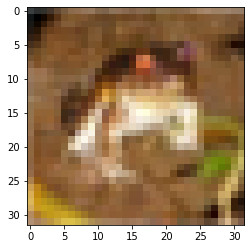

In [98]:
# Displaying an image
img = plt.imshow(x_train[0])

In [99]:
# Displaying the label of the image
print('The label is:', y_train[0])

The label is: [6]


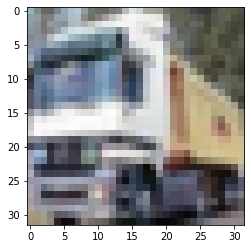

In [100]:
img = plt.imshow(x_train[1])

In [101]:
print('The label is:', y_train[1])

The label is: [9]


In [102]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [103]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [104]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [105]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [106]:
# Creating a model building and training the neural network (Using Conventional 2D tensor and MaxPooling layers)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [107]:
model = Sequential()

In [108]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

In [109]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [110]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [111]:
# Configuring the algorithm, the loss function, and the metrics to track
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training our neural network with a batch size of 32 and 20 epochs, splitting the dataset using validation split(20%).
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 83s 66ms/step - loss: 1.5367 - accuracy: 0.4418 - val_loss: 1.1309 - val_accuracy: 0.6005
Epoch 2/20
1250/1250 [==============================] - 75s 60ms/step - loss: 1.1022 - accuracy: 0.6087 - val_loss: 0.9142 - val_accuracy: 0.6784
Epoch 3/20
1250/1250 [==============================] - 78s 63ms/step - loss: 0.9424 - accuracy: 0.6643 - val_loss: 0.8148 - val_accuracy: 0.7175
Epoch 4/20
1250/1250 [==============================] - 80s 64ms/step - loss: 0.8455 - accuracy: 0.7048 - val_loss: 0.8214 - val_accuracy: 0.7144
Epoch 5/20
1250/1250 [==============================] - 80s 64ms/step - loss: 0.7712 - accuracy: 0.7263 - val_loss: 0.7264 - val_accuracy: 0.7508
Epoch 6/20
1250/1250 [==============================] - 79s 63ms/step - loss: 0.7123 - accuracy: 0.7493 - val_loss: 0.7349 - val_accuracy: 0.7445
Epoch 7/20
1250/1250 [==============================] - 79s 63ms/step - loss: 0.6604 - accuracy: 0.7654 - val_loss: 0.7213 -

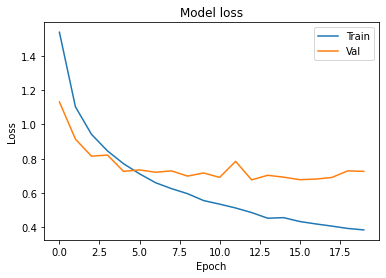

In [112]:
# Creating a plot to visualize the losses and validation loss of the model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

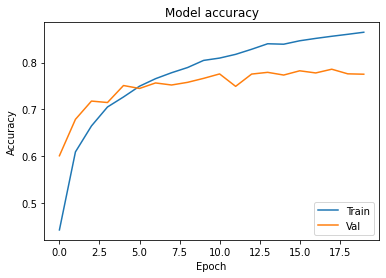

In [113]:
# Creating a plot to visualize the accuracy and validation accuracy of the model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [114]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 3s 11ms/step - loss: 0.7358 - accuracy: 0.7686


0.7685999870300293

In [115]:
# Saving the model
model.save('my_cifar10_model.h5')

In [116]:
# Importing local image
my_image = plt.imread("cat.jpg")

In [117]:
# Resizing the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

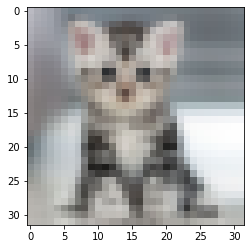

In [118]:
img = plt.imshow(my_image_resized)

In [119]:
# Store into a variable the predictionof the resized image
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

1/1 [==============================] - 0s 68ms/step


In [120]:
# Display the probabilities rates
probabilities

array([[9.0924734e-03, 3.0980249e-05, 3.0993947e-03, 1.9674745e-01,
        4.8504602e-02, 6.5319723e-01, 9.0583977e-05, 8.8800870e-02,
        2.8678469e-04, 1.4964798e-04]], dtype=float32)

In [122]:
# Predicting the image identity
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.6531972
Second most likely class: cat -- Probability: 0.19674745
Third most likely class: horse -- Probability: 0.08880087
Fourth most likely class: deer -- Probability: 0.048504602
Fifth most likely class: airplane -- Probability: 0.009092473
